<a href="https://colab.research.google.com/github/kiseonjeong/finance-study/blob/main/trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install finterstellar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True            # to remove matplotlib font warning

import finterstellar as fs

# MACD

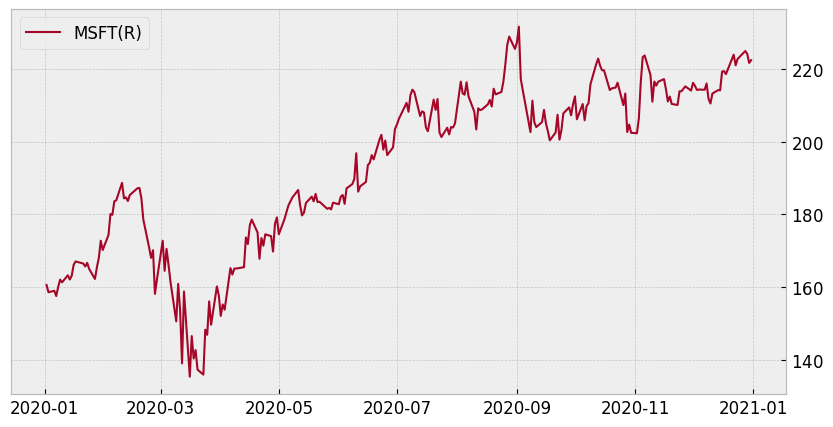

In [3]:
symbol = 'MSFT'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

In [4]:
fs.macd(df)

,MSFT,macd,macd_signal,macd_oscillator
2020-01-02,160.62,0.00,0.00,0.00
2020-01-03,158.62,-0.04,-0.02,-0.02
2020-01-06,159.03,-0.04,-0.03,-0.01
2020-01-07,157.58,-0.10,-0.05,-0.05
2020-01-08,160.09,-0.02,-0.04,0.02
...,...,...,...,...
2020-12-24,222.75,2.24,1.37,0.87
2020-12-28,224.96,2.55,1.61,0.94
2020-12-29,224.15,2.69,1.82,0.87
2020-12-30,221.68,2.57,1.97,0.60


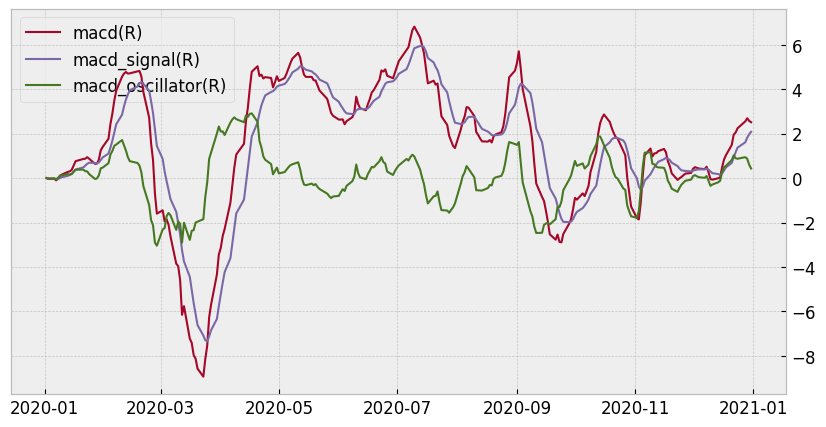

In [5]:
fs.draw_chart(df, right=['macd', 'macd_signal', 'macd_oscillator'])

In [6]:
fs.indicator_to_signal(df, factor='macd_oscillator', buy=0, sell=0)

2020-01-02    zero
2020-01-03    zero
2020-01-06    zero
2020-01-07    zero
2020-01-08     buy
              ... 
2020-12-24     buy
2020-12-28     buy
2020-12-29     buy
2020-12-30     buy
2020-12-31     buy
Name: trade, Length: 253, dtype: object

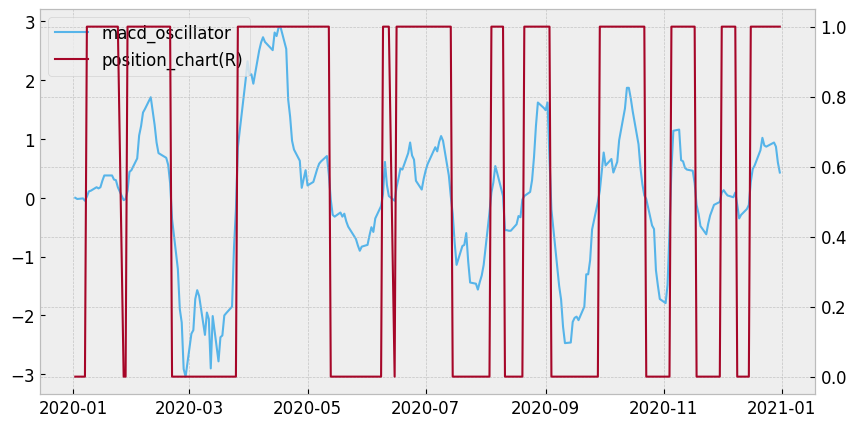

In [7]:
fs.position(df)
fs.draw_chart(df, right='position_chart', left='macd_oscillator')

CAGR: 23.49%
Accumulated return: 23.49%
Average return: 2.15%
Benchmark return : 38.48%
Number of trades: 11
Number of win: 6
Hit ratio: 54.55%
Investment period: 1.0yrs
Sharpe ratio: 0.77
MDD: -11.28%
Benchmark MDD: -28.24%


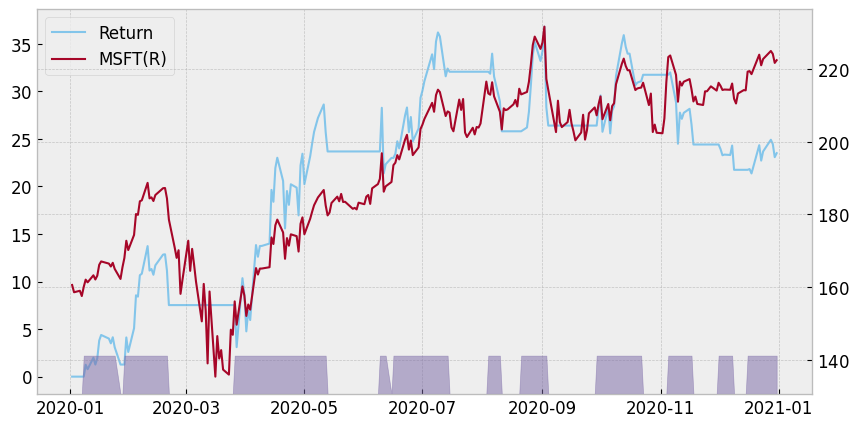

In [8]:
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

# RSI

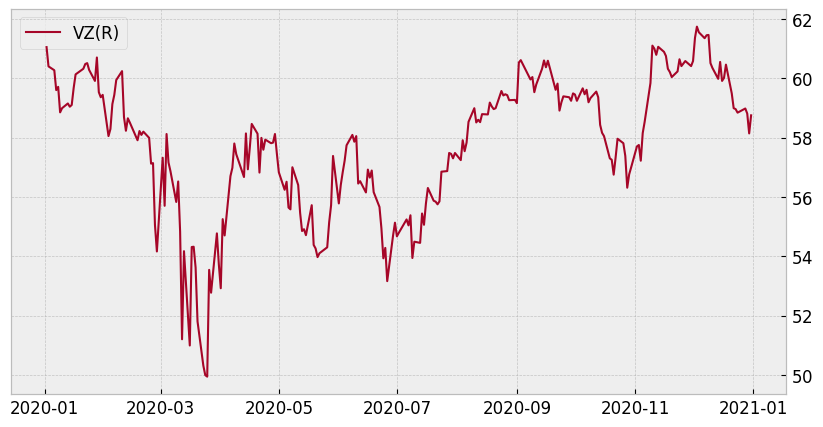

In [9]:
symbol = 'VZ'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

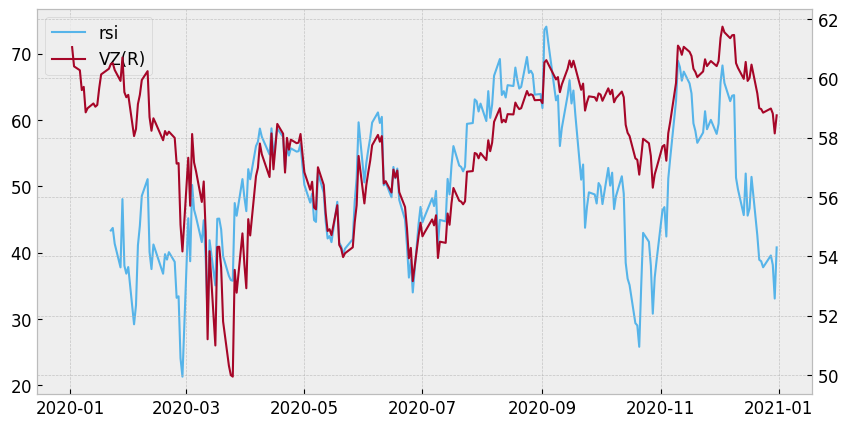

In [10]:
fs.rsi(df, w=14)
fs.draw_chart(df, left='rsi', right=symbol)

CAGR: 7.22%
Accumulated return: 6.80%
Average return: 4.17%
Benchmark return : -2.86%
Number of trades: 2
Number of win: 1
Hit ratio: 50.00%
Investment period: 0.9yrs
Sharpe ratio: 0.21
MDD: -17.10%
Benchmark MDD: -18.20%


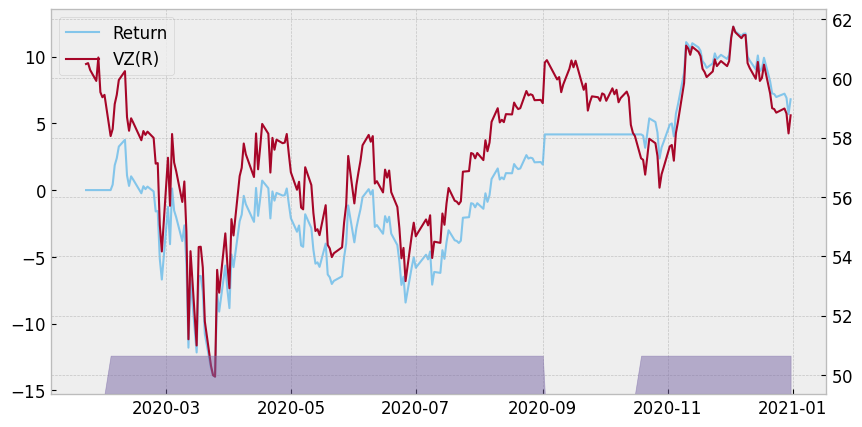

In [11]:
fs.indicator_to_signal(df, factor='rsi', buy=30, sell=70)
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

# Envelope

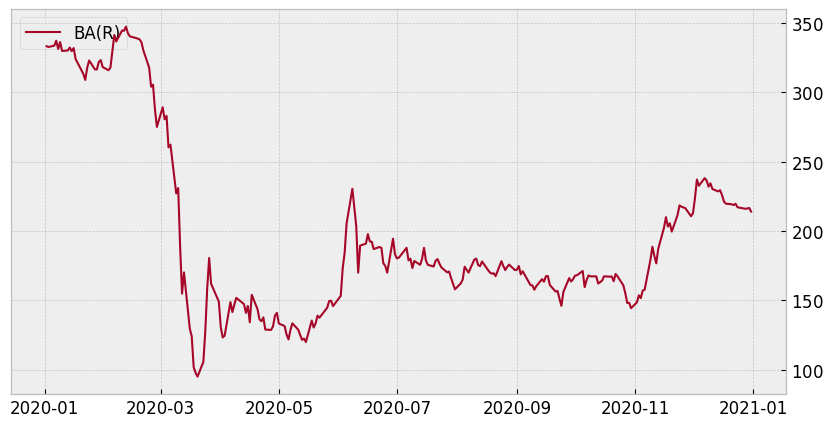

In [12]:
symbol = 'BA'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

In [13]:
fs.envelope(df, w=20, spread=.1)
df.tail()

,BA,center,ub,lb
2020-12-24,217.15,225.27,247.80,202.75
2020-12-28,216.09,225.25,247.78,202.73
2020-12-29,216.25,225.53,248.08,202.98
2020-12-30,216.67,225.71,248.28,203.14
2020-12-31,214.06,225.22,247.74,202.70


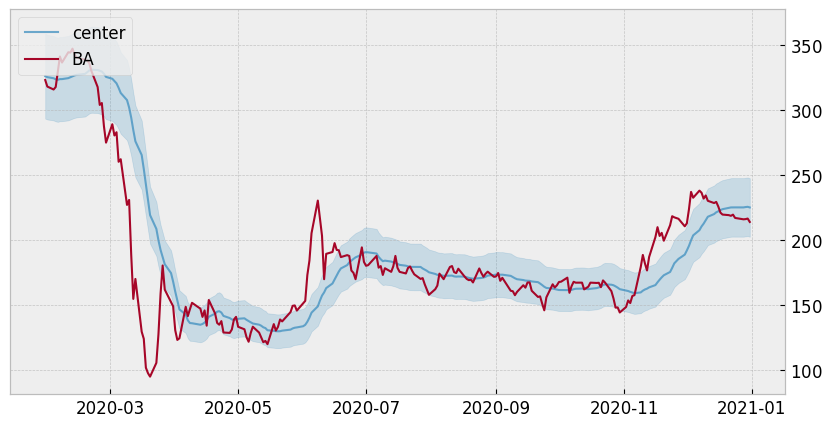

In [16]:
fs.draw_band_chart(df)

In [14]:
fs.band_to_signal(df, buy='A', sell='B')

2020-01-02    zero
2020-01-03    zero
2020-01-06    zero
2020-01-07    zero
2020-01-08    zero
              ... 
2020-12-24    zero
2020-12-28    zero
2020-12-29    zero
2020-12-30    zero
2020-12-31    zero
Name: trade, Length: 253, dtype: object

CAGR: 38.38%
Accumulated return: 35.33%
Average return: 5.58%
Benchmark return : -33.79%
Number of trades: 6
Number of win: 4
Hit ratio: 66.67%
Investment period: 0.9yrs
Sharpe ratio: 0.88
MDD: -26.49%
Benchmark MDD: -72.66%


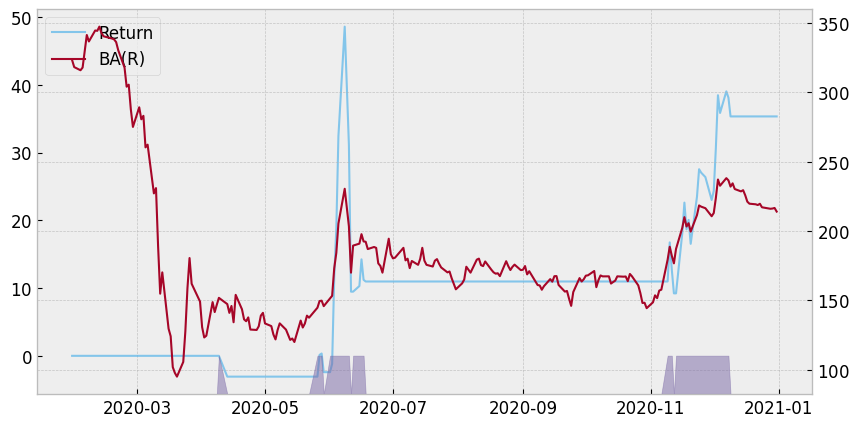

In [15]:
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)